In [222]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disable GPU usage for TensorFlow

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [223]:
webcam_path = 'data/webcam'
drawing_path = 'data/drawing'

webcam_pics = os.listdir(webcam_path)
drawing_pics = os.listdir(drawing_path)

webcam_pics, drawing_pics

(['picture_3.png',
  'picture_6.png',
  'picture_1.png',
  'picture_0.png',
  'picture_2.png',
  'picture_7.png',
  'picture_4.png',
  'picture_8.png',
  'picture_5.png',
  'picture_9.png'],
 ['drawing_3.png', 'drawing_2.png', 'drawing_4.png', 'drawing_1.png'])

In [224]:
def preprocess_webcam_image(image_path):
    kernel = np.ones((5,5), np.uint8)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    # print(img.shape)
    # img = np.reshape(img, (28, 28))

    return img

In [225]:
def preprocess_drawing_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.GaussianBlur(img, (5, 5), 0)
    # Augmentation des contrastes
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    kernel = np.ones((5,5), np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    img = clahe.apply(img)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0

    return img

In [226]:
full_path = os.path.join(webcam_path, webcam_pics[0])
processed_webcam_image = preprocess_webcam_image(full_path)
processed_webcam_image.shape

(28, 28)

In [227]:
full_path = os.path.join(drawing_path, drawing_pics[0])
processed_drawing_image = preprocess_drawing_image(full_path)
processed_drawing_image.shape

(28, 28)

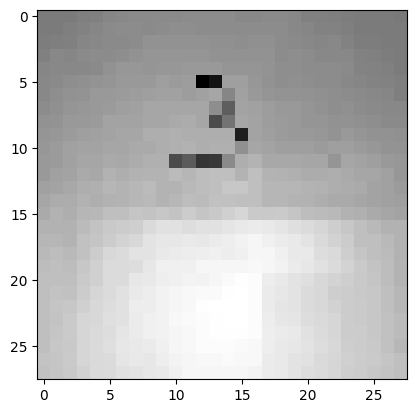

In [228]:
plt.plot()
plt.imshow(processed_webcam_image, cmap=plt.get_cmap('gray'))
plt.show()

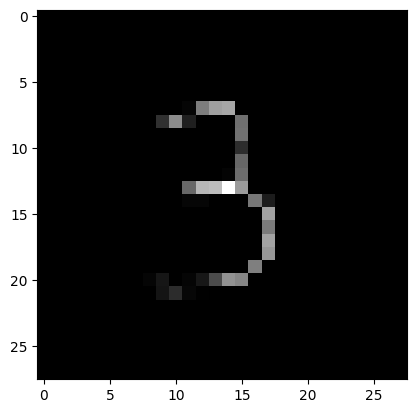

In [229]:
plt.plot()
plt.imshow(processed_drawing_image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [230]:
from tensorflow.keras.models import load_model
model = load_model('mnist.keras')

In [231]:
# test_data = np.array(processed_webcam_image)
test_data = processed_webcam_image.reshape(1, 28, 28)

In [232]:
predictions = model.predict(test_data)
predictions

1/1 [==============================] - 0s 191ms/step


array([[0.03977757, 0.09899949, 0.12115202, 0.2050262 , 0.07320613,
        0.0729587 , 0.04236082, 0.10931005, 0.09530709, 0.14190201]],
      dtype=float32)

In [233]:
predicted_digit = np.argmax(predictions)
predicted_digit

3

In [234]:
# test_data = np.array(processed_webcam_image)
test_data_drawing = processed_drawing_image.reshape(1, 28, 28)

In [235]:
predictions_drawing = model.predict(test_data_drawing)
predictions_drawing

1/1 [==============================] - 0s 32ms/step


array([[0.02519857, 0.05817736, 0.0909274 , 0.1583152 , 0.06703207,
        0.12072197, 0.04965269, 0.06873589, 0.18615948, 0.17507933]],
      dtype=float32)

In [236]:
predicted_digit_drawing = np.argmax(predictions_drawing)
predicted_digit_drawing

8